In [ ]:
# Here I check representativity of the data by training a simple feedforward NN 
# input -- particle features
# output -- whether or not this set of features correspond to a particle coming from the decay of a beauty or charm heavy hadron

In [ ]:
!pip install uproot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from google.colab import drive
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
particles_file = uproot.open("/content/drive/MyDrive/IRIS-HEP_DFEI/particles_data.root")

In [ ]:
particles_tree = particles_file['Particles']

In [ ]:
particles_tree.keys()

['EventNumber',
 'ExpandedEventNumber',
 'ExpandedParticleIndex',
 'ExpandedPrimaryHeavyHadronIndex',
 'FromPrimaryHeavyHadron',
 'MotherId',
 'MotherIndex',
 'NumVisDaugh',
 'ParticleIndex',
 'ParticleType',
 'PrimaryHeavyHadronIndex',
 'Prob_K',
 'Prob_e',
 'Prob_gamma',
 'Prob_mu',
 'Prob_p',
 'Prob_pi',
 'Prob_pi0',
 'TriggerKey',
 'associated_ip',
 'associated_ip_reco',
 'associated_xPV',
 'associated_xPV_reco',
 'associated_yPV',
 'associated_yPV_reco',
 'associated_zPV',
 'associated_zPV_reco',
 'charge',
 'gammactau',
 'id',
 'inGeomAcc',
 'ip',
 'ip_reco',
 'isCharged',
 'isFinal',
 'isbhadron',
 'ischadron',
 'pt',
 'pt_reco',
 'px',
 'px_reco',
 'py',
 'py_reco',
 'pz',
 'pz_reco',
 'xPV',
 'xPV_reco',
 'xProd',
 'xProd_reco',
 'yPV',
 'yPV_reco',
 'yProd',
 'yProd_reco',
 'zPV',
 'zPV_reco',
 'zProd',
 'zProd_reco']

In [ ]:
relavant_particles_keys = ['ExpandedEventNumber',
                          'ExpandedParticleIndex',
                          'ExpandedPrimaryHeavyHadronIndex',
                          'FromPrimaryHeavyHadron',
                          'ParticleType',
                          'associated_ip_reco',
                          'associated_xPV_reco',
                          'associated_yPV_reco',
                          'associated_zPV_reco',
                          'charge',
                          'inGeomAcc',
                          #'ip_reco',
                          'isCharged',
                          'pt_reco',
                          'px_reco',
                          'py_reco',
                          'pz_reco',
                          #'xPV_reco',
                          'xProd_reco',
                          #'yPV_reco',
                          'yProd_reco',
                          #'zPV_reco',
                          'zProd_reco']

In [ ]:
df = particles_tree.arrays(relavant_particles_keys, library='pd')

In [ ]:
df

,ExpandedEventNumber,ExpandedParticleIndex,ExpandedPrimaryHeavyHadronIndex,FromPrimaryHeavyHadron,ParticleType,associated_ip_reco,associated_xPV_reco,associated_yPV_reco,associated_zPV_reco,charge,inGeomAcc,isCharged,pt_reco,px_reco,py_reco,pz_reco,xProd_reco,yProd_reco,zProd_reco
0,0.0,1057.0,-1.0,0.0,2.0,-1.000000,-1.000000,-1.000000,-1.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1106.0,-1.0,0.0,0.0,0.015194,-0.078272,-0.006414,-29.304338,-1.0,1.0,1.0,0.286947,-0.153205,-0.242625,2.750225,-0.642510,-0.880182,-19.230768
2,0.0,1110.0,-1.0,0.0,0.0,0.006571,-0.078272,-0.006414,-29.304338,1.0,1.0,1.0,0.576406,-0.555643,-0.153313,13.076964,-0.511701,-0.120768,-19.230768
3,0.0,1111.0,-1.0,0.0,0.0,0.010698,-0.078272,-0.006414,-29.304338,-1.0,1.0,1.0,0.922732,-0.865247,0.320597,6.068925,-1.524306,0.530222,-19.230768
4,0.0,1112.0,-1.0,0.0,0.0,0.010318,-0.078272,-0.006414,-29.304338,1.0,1.0,1.0,0.253314,-0.246892,0.056676,1.878958,-1.392859,0.292333,-19.230768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374328,6161.0,2430.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.657934,-0.611031,0.243963,3.661947,0.000000,0.000000,0.000000
1374329,6161.0,2431.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.559823,-0.523263,-0.198992,2.484762,0.000000,0.000000,0.000000
1374330,6161.0,2444.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.313306,-0.313267,0.004922,1.603106,0.000000,0.000000,0.000000
1374331,6161.0,2445.0,-1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.416930,-0.082793,0.408627,2.115970,0.000000,0.000000,0.000000


In [ ]:
df = df.sample(frac=1)

In [ ]:
df_X = df.loc[:, ~df.columns.isin(['FromPrimaryHeavyHadron', 'ExpandedEventNumber', 'ExpandedParticleIndex', 'ExpandedPrimaryHeavyHadronIndex', 'ParticleType', 'inGeomAcc'])]
df_Y = df.loc[:, df.columns == 'FromPrimaryHeavyHadron']

In [ ]:
df_X

,associated_ip_reco,associated_xPV_reco,associated_yPV_reco,associated_zPV_reco,charge,isCharged,pt_reco,px_reco,py_reco,pz_reco,xProd_reco,yProd_reco,zProd_reco
1203463,0.040103,-0.023519,0.007439,-22.497545,-1.0,1.0,0.206147,-0.074433,0.192240,7.117587,-0.019840,0.108948,-19.230768
1264645,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.379825,-0.057700,1.378618,4.718523,0.000000,0.000000,0.000000
330109,0.025785,-0.020832,0.071012,-104.150291,-1.0,1.0,0.380657,-0.148885,0.350333,1.297010,-0.923175,2.209087,-96.153847
1369253,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.142113,0.044305,-0.135030,0.930222,0.000000,0.000000,0.000000
1153734,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.785183,0.534060,0.575580,34.057781,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531646,0.000777,0.050324,0.061520,80.997368,1.0,1.0,0.267773,0.244761,-0.108602,5.955628,0.672492,-0.215145,96.153847
173278,0.033667,-0.094383,-0.052804,-42.126339,-1.0,1.0,0.259914,-0.254245,0.053988,0.929700,-1.063866,0.147817,-38.461536
409914,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.399712,0.392860,-0.073693,12.385528,0.000000,0.000000,0.000000
203890,0.006855,-0.013466,-0.008700,-36.209133,-1.0,1.0,1.322544,-0.830488,-1.029277,9.050136,-1.564963,-1.941783,-19.230768


In [ ]:
df_Y

,FromPrimaryHeavyHadron
1203463,0.0
1264645,0.0
330109,0.0
1369253,0.0
1153734,0.0
...,...
531646,0.0
173278,0.0
409914,0.0
203890,0.0


In [ ]:
# 50,000 for val_set
# 50,000 for test_set

X_train = df_X.iloc[:1274333, :]
Y_train = df_Y.iloc[:1274333, :]
X_val = df_X.iloc[1274333:1324333, :]
Y_val = df_Y.iloc[1274333:1324333, :]
X_test = df_X.iloc[1324333:, :]
Y_test = df_Y.iloc[1324333:, :]

X_train = X_train.values
Y_train = Y_train.values
X_val = X_val.values
Y_val = Y_val.values
X_test = X_test.values
Y_test = Y_test.values

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
mean = 0.0
ki0 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.1)
ki1 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki2 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki3 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki4 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.05)
ki5 = tf.keras.initializers.RandomNormal(mean=mean,stddev=0.001)

model = Sequential([
    Dense(300, activation='tanh', input_shape=(13,), name='h0', kernel_initializer = ki0),
    Dense(300, activation='tanh', name='h1', kernel_initializer = ki1),
    Dense(300, activation='tanh', name='h2', kernel_initializer = ki2),
    Dense(300, activation='tanh',  name='h3', kernel_initializer = ki3),
    Dense(300, activation='tanh',  name='h4', kernel_initializer = ki4),
    Dense(1, activation='sigmoid', name='y', kernel_initializer = ki5),
])

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h0 (Dense)                  (None, 300)               4200      
                                                                 
 h1 (Dense)                  (None, 300)               90300     
                                                                 
 h2 (Dense)                  (None, 300)               90300     
                                                                 
 h3 (Dense)                  (None, 300)               90300     
                                                                 
 h4 (Dense)                  (None, 300)               90300     
                                                                 
 y (Dense)                   (None, 1)                 301       
                                                                 
Total params: 365,701
Trainable params: 365,701
Non-trai

In [ ]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [ ]:
my_callbacks = [
    PlotLearning(),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/IRIS-HEP_DFEI/checkpoints/5hl_is_FromPrimaryHeavyHadron_particles_data_only/9_loss.cktp', 
                                       save_weights_only=True,
                                       monitor='loss',
                                       mode='min',
                                       save_best_only=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/IRIS-HEP_DFEI/checkpoints/5hl_is_FromPrimaryHeavyHadron_particles_data_only/9_valloss.cktp', 
                                       save_weights_only=True,
                                       monitor='val_loss',
                                       mode='min',
                                       save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', verbose=1, min_lr=1e-6, patience=20, min_delta=0.001)
   # tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10)
]

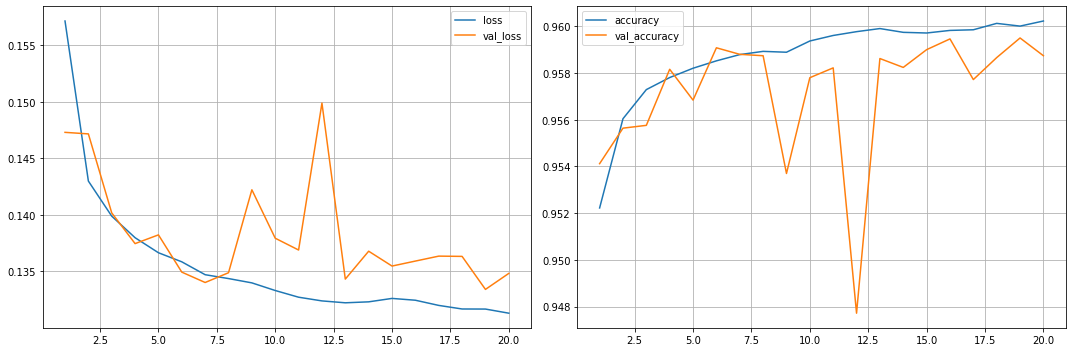

9956/9956 [==============================] - 29s 3ms/step - loss: 0.1313 - accuracy: 0.9602 - val_loss: 0.1348 - val_accuracy: 0.9587 - lr: 0.0010


In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, callbacks=my_callbacks,
          validation_data=(X_val, Y_val))

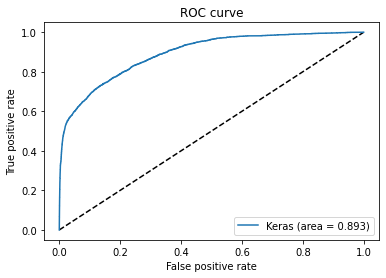

In [ ]:
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()